<a href="https://colab.research.google.com/github/gaditi123/Technical-Indicators-FA-Project/blob/main/Combination_MA_OBV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#importing required libraries
hdfc=pd.read_csv('/content/HDFCBANK.NS.csv')
print(hdfc.shape)

hdfc.index = hdfc["Date"].apply(lambda x: pd.Timestamp(x))
hdfc.drop("Date", axis=1, inplace=True)

hdfc.tail()

(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424
2019-03-27,1159.275024,1164.025024,1139.525024,1149.724976,1140.085938,6942650
2019-03-28,1149.400024,1162.500000,1143.925049,1151.400024,1141.746826,9777164


In [ ]:
!pip install yfinance
!pip install ta

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

In [7]:
def on_balance_volume(data, trend_periods=14, close_col='Adj Close', vol_col='Volume'):
    for index, row in data.iterrows():
        if index > 0:
            last_obv = data.at[index - 1, 'obv']
            if row[close_col] > data.at[index - 1, close_col]:
                current_obv = last_obv + row[vol_col]
            elif row[close_col] < data.at[index - 1, close_col]:
                current_obv = last_obv - row[vol_col]
            else:
                current_obv = last_obv
        else:
            last_obv = 0
            current_obv = row[vol_col]

        data.at[index, 'obv']= current_obv

    data['obv_ema' + str(trend_periods)] = data['obv'].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    
    return data

In [10]:
hdfc['14MA'] = hdfc["Adj Close"].rolling(window = 14).mean()

#Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

#Loop through the data set (close price) from the second row (index 1) to the end of the data set
for i in range(1, len(hdfc.Close)):
  if hdfc.Close[i] > hdfc.Close[i-1]:
    OBV.append(OBV[-1] + hdfc.Volume[i])
  elif hdfc.Close[i] < hdfc.Close[i-1]:
      OBV.append(OBV[-1] - hdfc.Volume[i])
  else:
      OBV.append(OBV[-1])

hdfc['OBV'] = OBV
hdfc['OBV_EMA'] = hdfc['OBV'].ewm(span=14).mean()

hdfc.head()

,Open,High,Low,Close,Adj Close,Volume,14MA,OBV,OBV_EMA
Date,,,,,,,,,
2018-04-02,945.250000,967.875000,945.250000,965.599976,951.427673,2298184,NaN,0,0.000000e+00
2018-04-03,961.974976,962.849976,955.500000,957.950012,943.889954,2039942,NaN,-2039942,-1.092826e+06
2018-04-04,956.474976,962.474976,939.224976,941.625000,927.804565,1857054,NaN,-3896996,-2.164029e+06
2018-04-05,950.650024,957.000000,945.099976,954.450012,940.441345,2429446,NaN,-1467550,-1.950956e+06
2018-04-06,956.099976,963.224976,952.900024,961.700012,947.584900,1860004,NaN,392454,-1.339564e+06


In [11]:
hdfc = hdfc.iloc[14:, :]
hdfc.head()

,Open,High,Low,Close,Adj Close,Volume,14MA,OBV,OBV_EMA
Date,,,,,,,,,
2018-04-20,970.500000,980.500000,966.075012,977.950012,963.596436,4680690,949.502760,6299504,9.940352e+05
2018-04-23,989.500000,989.500000,930.150024,967.875000,953.669312,7652310,950.201285,-1352806,6.458499e+05
2018-04-24,967.500000,974.025024,963.000000,967.500000,953.299744,2518708,952.022369,-3871514,-1.443730e+04
2018-04-25,963.950012,969.000000,956.000000,960.375000,946.279358,2010296,952.439370,-5881810,-8.611841e+05
2018-04-26,958.400024,969.599976,955.625000,965.125000,950.959595,3923740,952.680420,-1958070,-1.017761e+06


In [13]:
hdfc["Condition"] = 0
for index,row in hdfc.iterrows():
  if row["Adj Close"]>row["14MA"] and row["OBV"]>row["OBV_EMA"]:  
    hdfc.at[index,"Condition"] = 1
  elif row["Adj Close"]<row["14MA"] and row["OBV"]<row["OBV_EMA"]:  
    hdfc.at[index,"Condition"] = -1
  else :
    hdfc.at[index,"Condition"] = 0

hdfc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,14MA,OBV,OBV_EMA,Condition
Date,,,,,,,,,,
2018-04-20,970.500000,980.500000,966.075012,977.950012,963.596436,4680690,949.502760,6299504,9.940352e+05,1
2018-04-23,989.500000,989.500000,930.150024,967.875000,953.669312,7652310,950.201285,-1352806,6.458499e+05,0
2018-04-24,967.500000,974.025024,963.000000,967.500000,953.299744,2518708,952.022369,-3871514,-1.443730e+04,0
2018-04-25,963.950012,969.000000,956.000000,960.375000,946.279358,2010296,952.439370,-5881810,-8.611841e+05,-1
2018-04-26,958.400024,969.599976,955.625000,965.125000,950.959595,3923740,952.680420,-1958070,-1.017761e+06,-1
...,...,...,...,...,...,...,...,...,...,...
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940,1085.731131,47022950,3.266830e+07,1
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630,1092.741507,51622580,3.519554e+07,1
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424,1099.974993,57516004,3.817160e+07,1


In [14]:
import math
initial_amt = 5000
current_amt = 5000
hdfc["No_of_stocks"] = 0
prev_no_of_stock = 0

for index,row in hdfc.iterrows():
  if row["Condition"] == 1:
    if current_amt > row["Adj Close"]:
      hdfc.at[index,"No_of_stocks"] = math.floor(current_amt/row["Adj Close"])
      prev_no_of_stock = hdfc.at[index,"No_of_stocks"]
      current_amt = current_amt - (hdfc.at[index,"No_of_stocks"]*hdfc.at[index,"Adj Close"])
      print(current_amt)

    else:
      row["No_of_stocks"] = prev_no_of_stock

  elif row["Condition"] == -1:
    if prev_no_of_stock > 0:
      current_amt = current_amt + (prev_no_of_stock*hdfc.at[index,"Adj Close"])
      print(current_amt)
      hdfc.at[index,"No_of_stocks"] = 0
      prev_no_of_stock = 0

    else:
      row["No_of_stocks"] = 0

  else:
    hdfc.at[index,"No_of_stocks"] = prev_no_of_stock


print(current_amt)

182.01782000000003
4913.41461
61.931759999999485
4963.666379999999
15.62194499999896
5082.408444999999
1004.5854449999993
5212.310052999999
239.23082799999884
5060.964227999999
82.9271179999987
4978.040032999999
22.68602799999917
4903.4208929999995
50.079522999999426
5155.787227999999
988.4210159999993
5114.832635999999
905.7198439999993
5080.5230679999995
870.3194559999993
5058.5093959999995
850.2886919999992
5025.785763999999
833.1334199999992
4977.890255999999
799.0216039999987
799.0216039999987


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
hdfc.head()

,Open,High,Low,Close,Adj Close,Volume,14MA,OBV,OBV_EMA,Condition,No_of_stocks
Date,,,,,,,,,,,
2018-04-20,970.500000,980.500000,966.075012,977.950012,963.596436,4680690,949.502760,6299504,9.940352e+05,1,5
2018-04-23,989.500000,989.500000,930.150024,967.875000,953.669312,7652310,950.201285,-1352806,6.458499e+05,0,5
2018-04-24,967.500000,974.025024,963.000000,967.500000,953.299744,2518708,952.022369,-3871514,-1.443730e+04,0,5
2018-04-25,963.950012,969.000000,956.000000,960.375000,946.279358,2010296,952.439370,-5881810,-8.611841e+05,-1,0
2018-04-26,958.400024,969.599976,955.625000,965.125000,950.959595,3923740,952.680420,-1958070,-1.017761e+06,-1,0


In [16]:
startidx = 0
endidx = len(hdfc)
      
dates = hdfc.index
close = hdfc['Adj Close']
stocks = hdfc["No_of_stocks"]
condition = hdfc["Condition"]

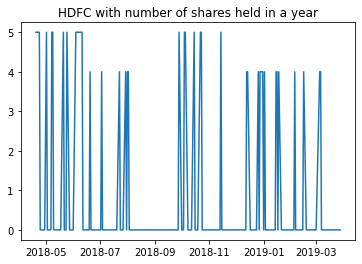

In [17]:
plt.title("HDFC with number of shares held in a year")
plt.plot(dates,stocks)
plt.show()

In [18]:
print("Total profit made = Rs " ,(current_amt - initial_amt))
print("Percentage of profit = ",((current_amt-initial_amt)/initial_amt)*100, "%" )

Total profit made = Rs  -4200.978396000001
Percentage of profit =  -84.01956792000003 %
